In [85]:
import numpy as np
import pandas as pd
from tqdm import tqdm 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [74]:
a = np.array([
        [0,0,0,0],
        [1/3,0,0,0],
        [-1/3,1,0,0],
        [1,-1,1,0],
    ])
b = np.array([1/8 , 3/8, 3/8, 1/8])
c = np.array([0,1/3, 2/3, 1])

def get_next_U(f, h, t, y):
    k1 = f(t, y)
    k2 = f(t + c[1]*h, y + h * (a[1][0] * k1 ))
    k3 = f(t + c[2]*h, y + h * (a[2][0] * k1 + a[2][1] * k2))
    k4 = f(t + c[3]*h, y + h * (a[3][0] * k1 + a[3][1] * k2 + a[3][2] * k2))
    k = np.array([k1,k2,k3,k4])
    u_next = y + np.sum(h * b * k)
    return u_next

def solve_rk(f,u0, T, n, max_iter=10):
    h = T / n
    U_trace = []
    for it in tqdm(range(max_iter), position=0):
        U_cur = np.zeros(n + 1, dtype=np.float32)
        U_cur[0] = u0
        for i in range(n):
            U_cur[i+1] = get_next_U(f, h, h*(i+1), U_cur[i])
        U_trace.append(U_cur)
    return U_trace
    

In [ ]:
def iterate_through_step_decreasing(f, u0, T, n0, niters, max_iter=10):
    U_trace = np.array([solve_rk(f,u0,T,n,max_iter)[-1] for n in N_all])
    error = np.array([np.max(np.abs(U_trace[-1] - U_trace[i])) for i in range(len(U_trace-1))])
    return error, N_all

In [121]:
def plot_solution(X, approx, expected=None):
    if not approx is None:
        plt.plot(X,approx,label='approx')
    if not expected is None:
        plt.plot(X,expected, label='expected')
    plt.legend(loc='best')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
def get_error(approx,expected):
    error = np.max(np.abs(approx - expected))
    x_error = np.argmax(np.abs(approx - expected))
    return error,x_error

In [122]:
def func_1(t, y):
    # e^x
    return y

def sol_1(t, y0):
    return np.exp(t)

def func_2(t, y):
    return 1

def sol_2(t, y0):
    return t + y0

def func_3(t, y):
    return -y

def sol_3(t,y0):
    return np.exp(-t)

def very_complex_f(t,y):
    return t - y - 1

100%|██████████| 1/1 [00:00<00:00, 1166.70it/s]

11


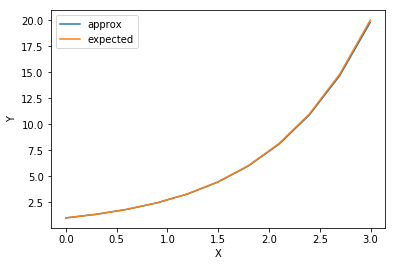

error =  0.217849731445  at x =  2.99573227355


In [123]:
N = 10
X = np.arange(0,np.log(20) + 1e-9,np.log(20)/N)
print(len(X))
approx = solve_rk(func_1, 1.0, np.log(20), N, max_iter=1)[-1]
expected = np.array(sol_1(X,1.0))
plot_solution(X, approx, expected)

error,xerr = get_error(approx,expected)
print('error = ', error, ' at x = ', X[xerr])

100%|██████████| 1/1 [00:00<00:00, 961.56it/s]

11


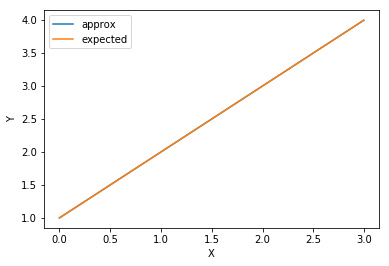

error =  4.42957067026e-07  at x =  2.99573227355


In [124]:
N = 10
X = np.arange(0,np.log(20) + 1e-9,np.log(20)/N)
print(len(X))
approx = solve_rk(func_2, 1.0, np.log(20), N, max_iter=1)[-1]
expected = np.array(sol_2(X,1.0))
plot_solution(X, approx, expected)
error,xerr = get_error(approx,expected)
print('error = ', error, ' at x = ', X[xerr])

100%|██████████| 1/1 [00:00<00:00, 2092.97it/s]

11


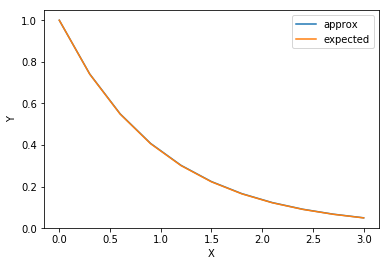

error =  0.00132974979195  at x =  0.9


In [125]:
N = 10
T = 3 
X = np.arange(0,T + 1e-9,T/N)
print(len(X))
approx = solve_rk(func_3, 1.0, T, N, max_iter=1)[-1]
expected = np.array(sol_3(X,0.0))
plot_solution(X, approx, expected)
error,xerr = get_error(approx,expected)
print('error = ', error, ' at x = ', X[xerr])

100%|██████████| 1/1 [00:00<00:00, 1104.93it/s]

11


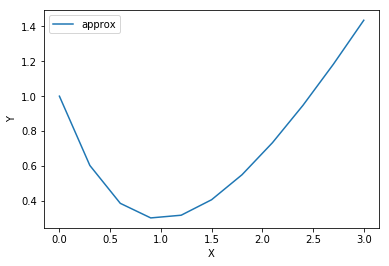

In [116]:
N = 10
T = 3 
X = np.arange(0,T + 1e-9,T/N)
print(len(X))
approx = solve_rk(very_complex_f, 1.0, T, N, max_iter=1)[-1]
plot_solution(X, approx)